# Desafio: 

Você está em um cassino quântico. O desafio é lançar dois dados simultaneamente. A regra para ganhar o prêmio é: a soma dos dois dados deve ser sempre ímpar (ou seja, um par e um ímpar, ou 0 e 1 no nosso sistema binário).

Se os dados caírem iguais (00 ou 11), você perde. Se caírem opostos (01 ou 10), você ganha. Como garantir a vitória usando a física?

**Objetivo:** Criar um sistema onde dois qubits estão emaranhados, mas sempre apresentam resultados opostos.


In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

**O Problema:**
O estado de Bell padrão ($|\Phi^+\rangle$) gera resultados correlacionados:
$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$
Isso significa que eles sempre caem iguais (00 ou 11). Não é o que queremos!

**A Solução:**
Para obter resultados opostos, precisamos aplicar uma porta **X (NOT)** em um dos qubits logo após o emaranhamento.
Isso transformará o estado para:
$$|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$$

In [10]:
simulator = AerSimulator()

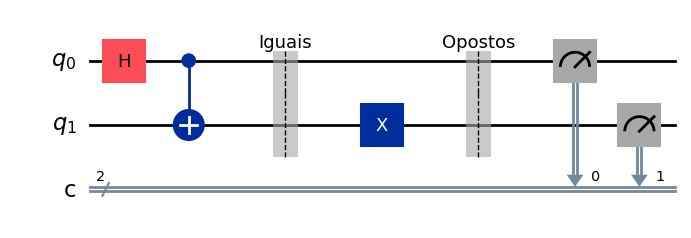

In [11]:

qc_dados = QuantumCircuit(2, 2)

qc_dados.h(0) 

qc_dados.cx(0, 1)
qc_dados.barrier(label="Iguais")

qc_dados.x(1) 
qc_dados.barrier(label="Opostos")

qc_dados.measure([0, 1], [0, 1])

display(qc_dados.draw('mpl'))

**1. Estado Inicial ($|00\rangle$):**
Começamos com dois qubits no estado fundamental.
$$|\psi_0\rangle = |00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

**2. Superposição (Hadamard no $q_0$):**
Aplicamos $H$ no primeiro qubit.
$$|\psi_1\rangle = (I \otimes H) |00\rangle = |0\rangle \otimes \frac{|0\rangle + |1\rangle}{\sqrt{2}} = \frac{|00\rangle + |01\rangle}{\sqrt{2}}$$
*(Nota: A notação do Qiskit é $|q_1 q_0\rangle$. O bit da direita é o $q_0$.)*

**3. Emaranhamento (CNOT $q_0 \to q_1$):**
O CNOT usa $q_0$ como controle e $q_1$ como alvo.
* Se $q_0$ é 0 (estado $|00\rangle$), $q_1$ não muda.
* Se $q_0$ é 1 (estado $|01\rangle$), $q_1$ vira 1 (o estado vira $|11\rangle$).

$$|\psi_2\rangle = \text{CNOT} \left( \frac{|00\rangle + |01\rangle}{\sqrt{2}} \right) = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

Este é o estado de Bell $|\Phi^+\rangle$. Aqui, os dados são **sempre iguais**.

**4. Porta X no $q_1$ (Anti-Correlação):**
Agora aplicamos a porta $X$ (NOT) apenas no Qubit 1 (o bit da esquerda).
$$X|0\rangle = |1\rangle \quad \text{e} \quad X|1\rangle = |0\rangle$$

Aplicando isso ao nosso par emaranhado:
* O termo $|00\rangle$ (onde $q_1=0$) vira $|10\rangle$.
* O termo $|11\rangle$ (onde $q_1=1$) vira $|01\rangle$.

$$|\psi_{final}\rangle = (X \otimes I) |\Phi^+\rangle = \frac{X|0\rangle \otimes |0\rangle + X|1\rangle \otimes |1\rangle}{\sqrt{2}}$$

$$|\psi_{final}\rangle = \frac{|10\rangle + |01\rangle}{\sqrt{2}}$$

O estado quântico final do sistema é:

$$|\psi_{final}\rangle = 0|00\rangle + \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle + 0|11\rangle$$


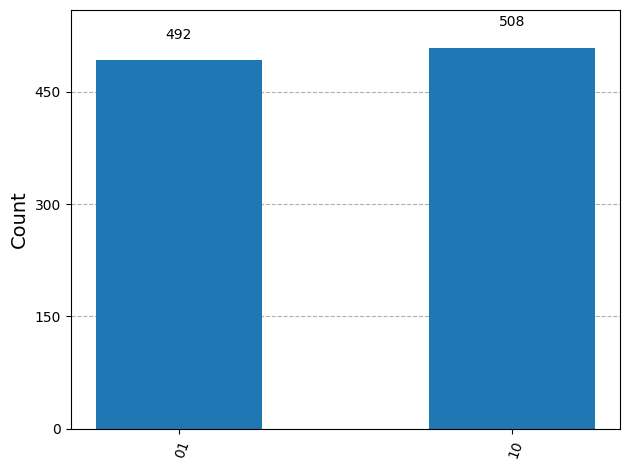

In [28]:

job = simulator.run(qc_dados, shots=1000)
result = job.result()
counts = result.get_counts()

display(plot_histogram(counts))


Para encontrar a probabilidade de medir cada resultado possível, elevamos ao quadrado o módulo da amplitude de cada estado (Regra de Born):

1.  **Probabilidade de $|00\rangle$ (Iguais - Zeros):**
    $$P(00) = |0|^2 = 0\%$$

2.  **Probabilidade de $|11\rangle$ (Iguais - Uns):**
    $$P(11) = |0|^2 = 0\%$$

3.  **Probabilidade de $|01\rangle$ (Opostos):**
    $$P(01) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$

4.  **Probabilidade de $|10\rangle$ (Opostos):**
    $$P(10) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$

In [13]:
estados_iguais = counts.get('00', 0) + counts.get('11', 0)
estados_opostos = counts.get('01', 0) + counts.get('10', 0)

print(f"\nJogadas onde os dados foram IGUAIS (Perdeu): {estados_iguais}")
print(f"Jogadas onde os dados foram OPOSTOS (Ganhou): {estados_opostos}")


Jogadas onde os dados foram IGUAIS (Perdeu): 0
Jogadas onde os dados foram OPOSTOS (Ganhou): 1000
